In [1]:
using ShipMMG

using Plots
using LaTeXStrings

┌ Info: Precompiling ShipMMG [37f2b0bf-0c13-4883-8808-e75eb56597e7]
└ @ Base loading.jl:1260


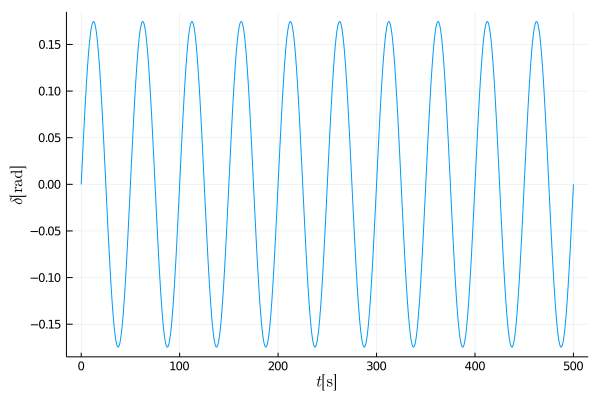

In [2]:
K_log = 0.155  # [1/s]
T_log = 80.5  # [s]
u0 = 20 * (1852.0 / 3600)  # [m/s] (knot * 1852/3600)
duration = 500  # [s]
sampling = 10000
time_list = range(0.0,stop=duration,length=sampling)
Ts = 50.0
δ_list = 10.0 * pi / 180.0  * sin.(2.0 * pi / Ts * time_list) # [rad]


plot(time_list, δ_list, xlabel = L"t \textrm{[s]}", ylabel=L"\delta \textrm{[rad]}", label="")

In [3]:
# @time sol=kt_simulate(time_list, δ_list, K_log, T_log, u0);

@time time, x, y, ψ, u, r, δ = kt_simulate(time_list, δ_list, K_log, T_log, u0);

  3.711462 seconds (13.98 M allocations: 693.614 MiB, 4.92% gc time)


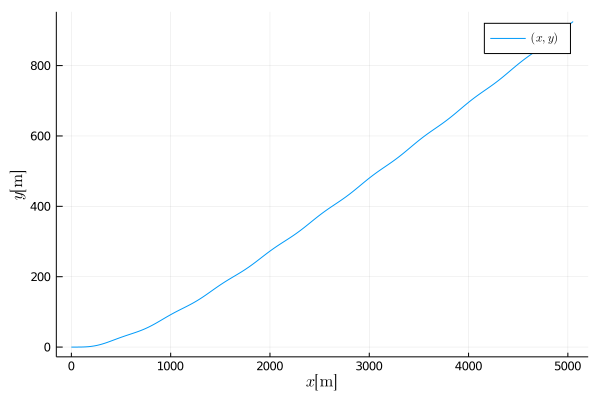

In [5]:
plot(x,y,label=L"(x,y)",xlabel=L"x \textrm{[m]}",ylabel=L"y \textrm{[m]}")

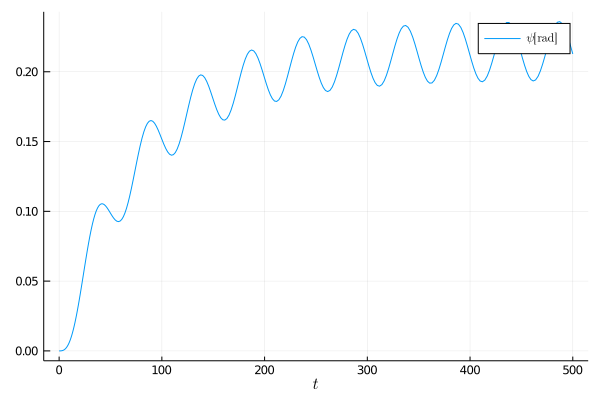

In [6]:
plot(time, ψ, xlabel=L"t", label=L"\psi \textrm{[rad]}")

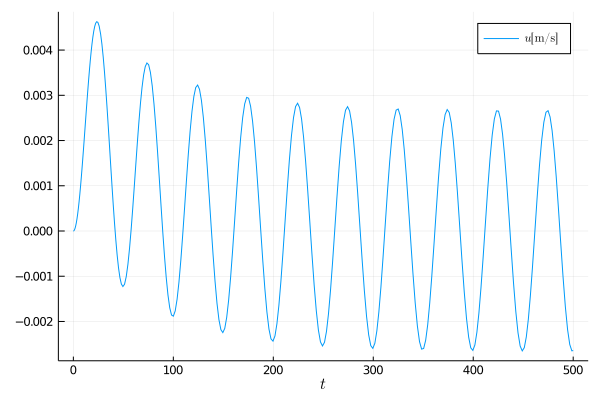

In [7]:
plot(time, u, xlabel=L"t", label=L"u \textrm{[m/s]}")

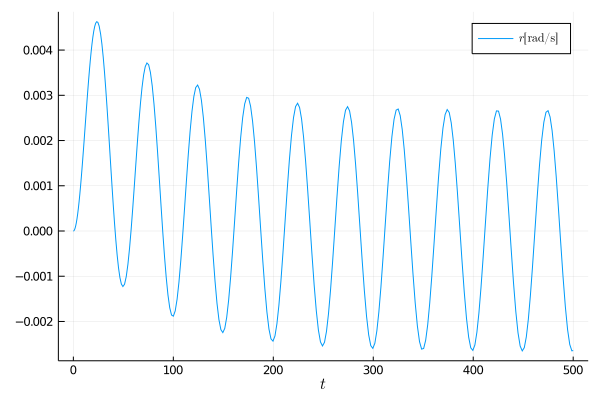

In [8]:
plot(time, r, xlabel=L"t", label=L"r \textrm{[rad/s]}")

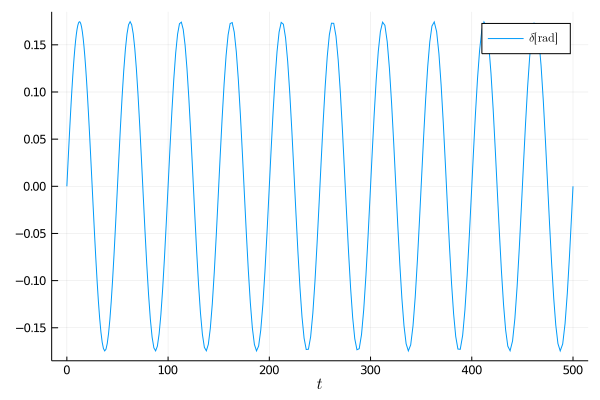

In [9]:
plot(time, δ, xlabel=L"t", label=L"\delta \textrm{[rad]}")